# Quantum classification of Iris dataset with 2 labels

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

from quantum_classification import *

### Traing with 2 features

In [2]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [4]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

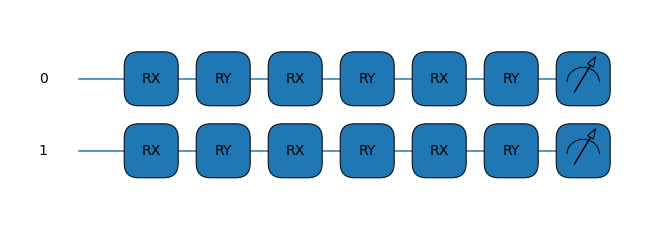

In [5]:
iris.draw_circuit()

In [6]:
iris.optimize()

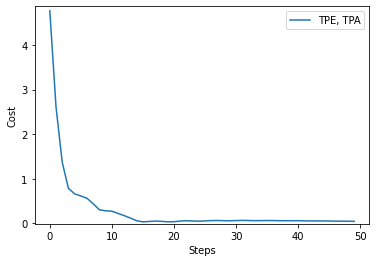

In [7]:
iris.plot_cost()

In [8]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.04539091787066694


### Train with 4 features

In [11]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 4 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.55 0.95 0.15 0.15] -1.0
[0.25 0.5  0.2  0.  ] -1.0
[0.6 0.2 1.4 0.5] 1.0


In [13]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

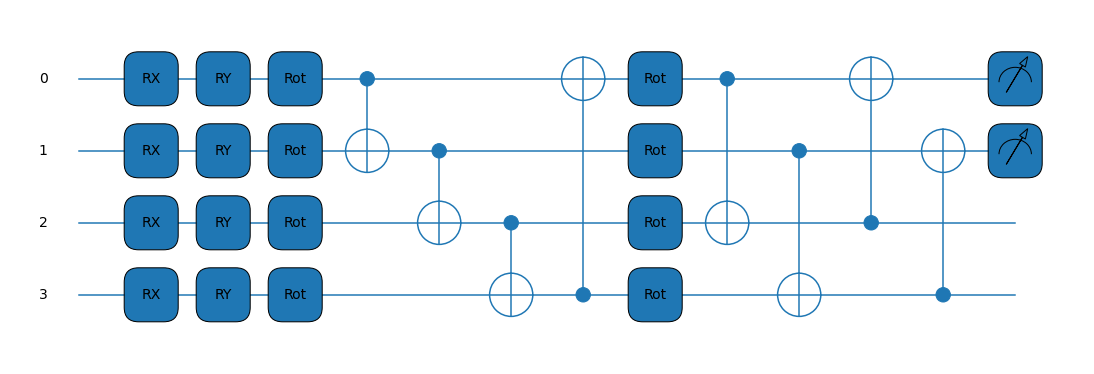

In [14]:
iris.draw_circuit()

In [15]:
iris.optimize()

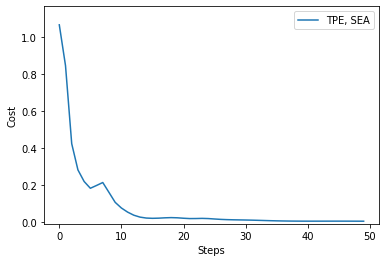

In [16]:
iris.plot_cost()

In [17]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.004038181982925655
